In [66]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = !unrar x /content/drive/MyDrive/Project/Dataset.rar

In [69]:
data=r'/content/Dataset'

In [70]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [71]:
images[:20]

['/content/Dataset/adenocarcinoma/ad10.png',
 '/content/Dataset/adenocarcinoma/000135 (5).png',
 '/content/Dataset/adenocarcinoma/ad21.png',
 '/content/Dataset/adenocarcinoma/000024 (9).png',
 '/content/Dataset/adenocarcinoma/000077 (9).png',
 '/content/Dataset/adenocarcinoma/000024 (7).png',
 '/content/Dataset/adenocarcinoma/000163 (7).png',
 '/content/Dataset/adenocarcinoma/000080 (6).png',
 '/content/Dataset/adenocarcinoma/000114 (2).png',
 '/content/Dataset/adenocarcinoma/000107 (9).png',
 '/content/Dataset/adenocarcinoma/000056 (8).png',
 '/content/Dataset/adenocarcinoma/000067.png',
 '/content/Dataset/adenocarcinoma/000109 (3).png',
 '/content/Dataset/adenocarcinoma/000022 (2).png',
 '/content/Dataset/adenocarcinoma/000025 (6).png',
 '/content/Dataset/adenocarcinoma/000116 (7).png',
 '/content/Dataset/adenocarcinoma/000102 (7).png',
 '/content/Dataset/adenocarcinoma/000040 (6).png',
 '/content/Dataset/adenocarcinoma/ad6 (2).png',
 '/content/Dataset/adenocarcinoma/000020 (10).png'

In [72]:
len(images)

1465

In [73]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [74]:
class_values[:10]

['adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma',
 'adenocarcinoma']

In [75]:
len(class_values)

1465

In [76]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [77]:
data

,image_path,class_label
0,/content/Dataset/normal/8 (3) - Copy.png,normal
1,/content/Dataset/squamous cell carcinoma/00010...,squamous cell carcinoma
2,/content/Dataset/adenocarcinoma/000102 (4).png,adenocarcinoma
3,/content/Dataset/adenocarcinoma/000093 (5).png,adenocarcinoma
4,/content/Dataset/adenocarcinoma/ad11 (2).png,adenocarcinoma
...,...,...
1460,/content/Dataset/squamous cell carcinoma/00004...,squamous cell carcinoma
1461,/content/Dataset/normal/7 - Copy - Copy (2).png,normal
1462,/content/Dataset/normal/18 - Copy.png,normal
1463,/content/Dataset/squamous cell carcinoma/00016...,squamous cell carcinoma


In [78]:
data.class_label.value_counts()

class_label
adenocarcinoma             533
squamous cell carcinoma    415
large cell carcinoma       302
normal                     215
Name: count, dtype: int64

In [79]:
df_c0 = data[data['class_label'] =="adenocarcinoma"]
df_c1 = data[data['class_label'] =="squamous cell carcinoma"]
df_c2 = data[data['class_label'] =="normal"]
df_c3 = data[data['class_label'] =="large cell carcinoma"]

In [80]:
from sklearn.utils import resample
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=400)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=400)
unsampled_df_c2 = resample(df_c2, replace=True, random_state=23, n_samples=400)
unsampled_df_c3 = resample(df_c3, replace=True, random_state=23, n_samples=400)

In [81]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1,unsampled_df_c2, unsampled_df_c3])
df_unsampled

,image_path,class_label
99,/content/Dataset/adenocarcinoma/000017 (8).png,adenocarcinoma
1337,/content/Dataset/adenocarcinoma/000041 (4).png,adenocarcinoma
69,/content/Dataset/adenocarcinoma/000098 (8).png,adenocarcinoma
662,/content/Dataset/adenocarcinoma/000063 (4).png,adenocarcinoma
1273,/content/Dataset/adenocarcinoma/000148.png,adenocarcinoma
...,...,...
734,/content/Dataset/large cell carcinoma/000133 (...,large cell carcinoma
1429,/content/Dataset/large cell carcinoma/l5.png,large cell carcinoma
901,/content/Dataset/large cell carcinoma/000126.png,large cell carcinoma
635,/content/Dataset/large cell carcinoma/000081 (...,large cell carcinoma


In [82]:
df_unsampled.head()

,image_path,class_label
99,/content/Dataset/adenocarcinoma/000017 (8).png,adenocarcinoma
1337,/content/Dataset/adenocarcinoma/000041 (4).png,adenocarcinoma
69,/content/Dataset/adenocarcinoma/000098 (8).png,adenocarcinoma
662,/content/Dataset/adenocarcinoma/000063 (4).png,adenocarcinoma
1273,/content/Dataset/adenocarcinoma/000148.png,adenocarcinoma


In [83]:
df_unsampled.tail()

,image_path,class_label
734,/content/Dataset/large cell carcinoma/000133 (...,large cell carcinoma
1429,/content/Dataset/large cell carcinoma/l5.png,large cell carcinoma
901,/content/Dataset/large cell carcinoma/000126.png,large cell carcinoma
635,/content/Dataset/large cell carcinoma/000081 (...,large cell carcinoma
1389,/content/Dataset/large cell carcinoma/000093 (...,large cell carcinoma


In [84]:
df_unsampled.class_label.value_counts()

class_label
adenocarcinoma             400
squamous cell carcinoma    400
normal                     400
large cell carcinoma       400
Name: count, dtype: int64

In [85]:
df_unsampled.shape

(1600, 2)

In [86]:
data = df_unsampled.sample(frac=1)
data.shape

(1600, 2)

In [87]:
data[:10]

,image_path,class_label
234,/content/Dataset/squamous cell carcinoma/00006...,squamous cell carcinoma
801,/content/Dataset/large cell carcinoma/000062 (...,large cell carcinoma
1389,/content/Dataset/large cell carcinoma/000093 (...,large cell carcinoma
1250,/content/Dataset/normal/n8 (2) - Copy.jpg,normal
348,/content/Dataset/large cell carcinoma/000169.png,large cell carcinoma
357,/content/Dataset/normal/12 (2) - Copy.png,normal
576,/content/Dataset/normal/17.png,normal
13,/content/Dataset/normal/16 - Copy (2) - Copy.png,normal
1432,/content/Dataset/large cell carcinoma/000137.png,large cell carcinoma
264,/content/Dataset/normal/18 - Copy (2) - Copy.png,normal


<ipython-input-88-2d1eefe42530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

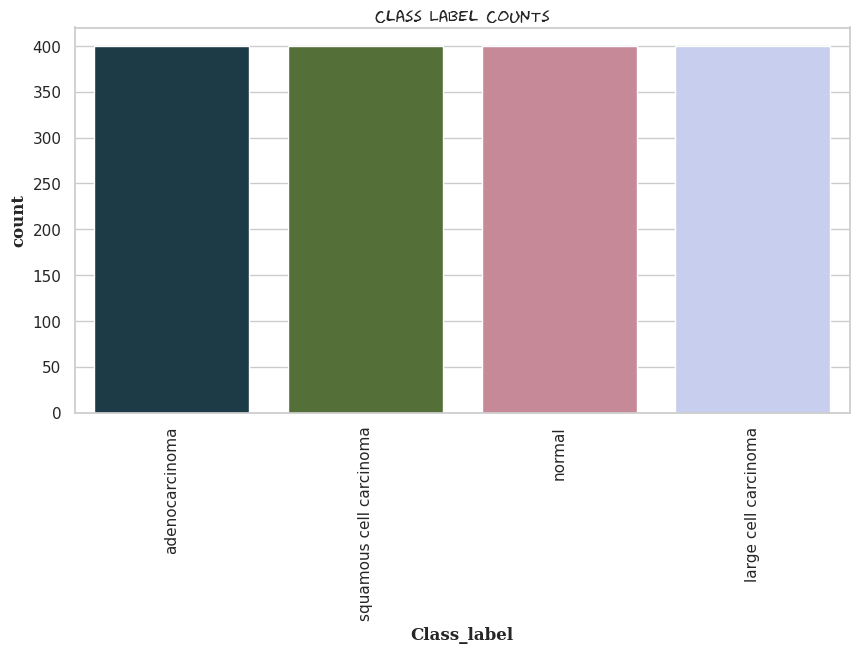

In [88]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [89]:
def resize_image(img):
    file = cv2.imread(img)
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [91]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

Streaming output truncated to the last 5000 lines.
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
/content/Dataset/squamous cell carcinoma/000089 (5).png
END
START
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 1  1  1]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[15 15 15]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[29 29 29]
  [22 22 22]
  [17 17 17]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[73 73 73]
  [55 55 55]
  [41 41 41]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
/content/Dataset/squamous cell carcinoma/000117 (6).png
END
START
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 

In [92]:
len(images)

1600

In [93]:
data['class_label'][:15]

234     squamous cell carcinoma
801        large cell carcinoma
1389       large cell carcinoma
1250                     normal
348        large cell carcinoma
357                      normal
576                      normal
13                       normal
1432       large cell carcinoma
264                      normal
506        large cell carcinoma
21                       normal
924        large cell carcinoma
1071       large cell carcinoma
823              adenocarcinoma
Name: class_label, dtype: object

In [94]:
class_names = list(data['class_label'])

In [95]:
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'squamous cell carcinoma')

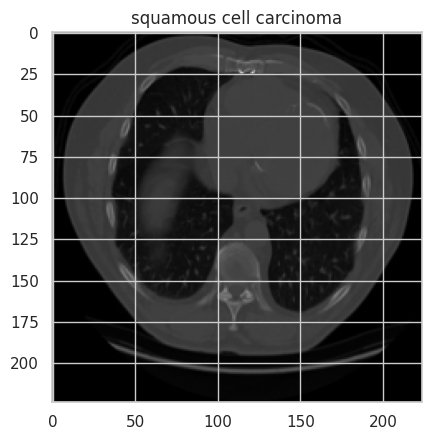

In [96]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'large cell carcinoma')

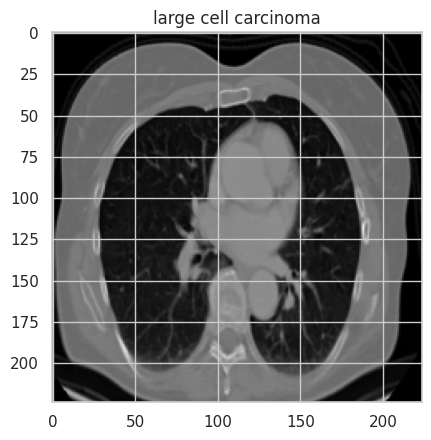

In [97]:
plt.imshow(images[188])
plt.title(class_names[188])

In [98]:
images = np.array(images)

In [99]:
images.shape

(1600, 224, 224, 3)

In [100]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [101]:
enc.classes_

array(['adenocarcinoma', 'large cell carcinoma', 'normal',
       'squamous cell carcinoma'], dtype='<U23')

In [102]:
data['class_label'][:10]

234     squamous cell carcinoma
801        large cell carcinoma
1389       large cell carcinoma
1250                     normal
348        large cell carcinoma
357                      normal
576                      normal
13                       normal
1432       large cell carcinoma
264                      normal
Name: class_label, dtype: object

In [103]:
y[:10]

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [104]:
y=np.array(y)
y

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [145]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [106]:
y_train[:5]

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [107]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1280, 224, 224, 3), (1280, 4), (320, 224, 224, 3), (320, 4))

In [130]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg.trainable=False
model_1 = Sequential([
    vgg,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
model_1.summary()
opt = Adam(lr=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc'), Precision(name='precision')])
History_1 = model_1.fit(x_train, y_train, epochs = 5, validation_data = (x_test,y_test),batch_size = 128)
score = model_1.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_27 (Flatten)        (None, 25088)             0         
                                                                 
 dense_54 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 4)                 516       
                                                                 
Total params: 17926596 (68.38 MB)
Trainable params: 3211908 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/5
10/10 [==============================] - 9s 659ms/step - loss: 27.3931 - accuracy: 0.4641 - auc: 0.6697 - precision: 0.4750 - val_loss: 0.9467 - val_accuracy: 0.6062 - val_auc: 0.8420 - val_precision: 0.7602
Epoch 2/5
10/10 [==============================] - 6s 613ms/step - loss: 0.9472 - accuracy: 0.5852 - auc: 0.8320 - precision: 0.8221 - val_loss: 0.9265 - val_accuracy: 0.5625 - val_auc: 0.8190 - val_precision: 0.8906
Epoch 3/5
10/10 [==============================] - 6s 628ms/step - loss: 0.8409 - accuracy: 0.6070 - auc: 0.8616 - precision: 0.8626 - val_loss: 0.7575 - val_accuracy: 0.6687 - val_auc: 0.9143 - val_precision: 0.9180
Epoch 4/5
10/10 [==============================] - 6s 618ms/step - loss: 0.7122 - accuracy: 0.6680 - auc: 0.9180 - precision: 0.8812 - val_loss: 0.6585 - val_accuracy: 0.6938 - val_auc: 0.9325 - val_precision: 0.9436
Epoch 5/5
10/10 [==============================] - 6s 620ms/step - loss: 0.6221 - accuracy: 0.7023 - auc: 0.9418 - precision: 0.913

In [147]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, Precision

mob=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
mob.trainable=False
model_2 = Sequential([
    mob,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
model_2.summary()
opt = Adam(lr=0.001)
model_2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc'), Precision(name='precision')])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

History_2 = model_2.fit(x_train, y_train, epochs = 5, validation_data = (x_test,y_test),batch_size = 128,callbacks=[early_stopping])
score = model_2.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_42 (Flatten)        (None, 62720)             0         
                                                                 
 dense_84 (Dense)            (None, 128)               8028288   
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 4)                 516       
                                                                 
Total params: 10286788 (39.24 MB)
Trainable params: 8028804 (30.63 MB)
Non-trainable params: 2257984 (8.61 MB)
________

Epoch 1/5
10/10 [==============================] - 7s 349ms/step - loss: 18.4507 - accuracy: 0.4633 - auc: 0.6674 - precision: 0.4688 - val_loss: 3.7959 - val_accuracy: 0.6500 - val_auc: 0.8271 - val_precision: 0.6500
Epoch 2/5
10/10 [==============================] - 2s 222ms/step - loss: 3.0387 - accuracy: 0.6883 - auc: 0.8451 - precision: 0.6883 - val_loss: 0.9576 - val_accuracy: 0.8094 - val_auc: 0.9346 - val_precision: 0.8094
Epoch 3/5
10/10 [==============================] - 2s 187ms/step - loss: 0.8425 - accuracy: 0.8328 - auc: 0.9474 - precision: 0.8348 - val_loss: 0.4140 - val_accuracy: 0.8719 - val_auc: 0.9786 - val_precision: 0.8770
Epoch 4/5
10/10 [==============================] - 2s 187ms/step - loss: 0.2237 - accuracy: 0.9125 - auc: 0.9904 - precision: 0.9158 - val_loss: 0.1720 - val_accuracy: 0.9406 - val_auc: 0.9936 - val_precision: 0.9525
Epoch 5/5
10/10 [==============================] - 2s 197ms/step - loss: 0.1344 - accuracy: 0.9555 - auc: 0.9971 - precision: 0.971

In [150]:
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet.trainable = False
model_3 = Sequential([
    resnet,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
model_3.summary()
opt = Adam(lr=0.001)
model_3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc')])
History_3 = model_3.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)
score = model_3.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_45 (Flatten)        (None, 100352)            0         
                                                                 
 dense_90 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_91 (Dense)            (None, 4)                 516       
                                                                 
Total params: 36433412 (138.98 MB)
Trainable params: 12845700 (49.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Epoch 1/5
10/10 [==============================] - 10s 696ms/step - loss: 37.2563 - accuracy: 0.5000 - auc: 0.6910 - val_loss: 0.8243 - val_accuracy: 0.8031 - val_auc: 0.9500
Epoch 2/5
10/10 [==============================] - 4s 462ms/step - loss: 2.5244 - accuracy: 0.7391 - auc: 0.8680 - val_loss: 1.5022 - val_accuracy: 0.7469 - val_auc: 0.8940
Epoch 3/5
10/10 [==============================] - 5s 506ms/step - loss: 0.6463 - accuracy: 0.7867 - auc: 0.9554 - val_loss: 0.2548 - val_accuracy: 0.9000 - val_auc: 0.9883
Epoch 4/5
10/10 [==============================] - 5s 467ms/step - loss: 0.3396 - accuracy: 0.8438 - auc: 0.9799 - val_loss: 0.2260 - val_accuracy: 0.9094 - val_auc: 0.9925
Epoch 5/5
10/10 [==============================] - 5s 510ms/step - loss: 0.2514 - accuracy: 0.8711 - auc: 0.9894 - val_loss: 0.1462 - val_accuracy: 0.9438 - val_auc: 0.9949
Test accuracy: 0.9438


In [143]:
from tensorflow.keras.applications import InceptionV3
inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_v3.trainable = False
model_4 = Sequential([
    inception_v3,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
opt = Adam(learning_rate=0.001)
model_4.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc')])
history_4 = model_4.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)
score = model_4.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')


Epoch 1/5
10/10 [==============================] - 9s 481ms/step - loss: 318.7685 - accuracy: 0.2953 - auc: 0.5307 - val_loss: 75.5600 - val_accuracy: 0.4531 - val_auc: 0.6405
Epoch 2/5
10/10 [==============================] - 3s 311ms/step - loss: 69.0775 - accuracy: 0.4602 - auc: 0.6435 - val_loss: 25.3351 - val_accuracy: 0.5250 - val_auc: 0.6994
Epoch 3/5
10/10 [==============================] - 3s 303ms/step - loss: 24.0397 - accuracy: 0.5492 - auc: 0.7124 - val_loss: 7.5859 - val_accuracy: 0.5219 - val_auc: 0.7305
Epoch 4/5
10/10 [==============================] - 3s 305ms/step - loss: 2.9044 - accuracy: 0.5016 - auc: 0.7520 - val_loss: 1.0608 - val_accuracy: 0.4563 - val_auc: 0.7239
Epoch 5/5
10/10 [==============================] - 3s 304ms/step - loss: 1.1845 - accuracy: 0.4242 - auc: 0.7094 - val_loss: 1.1312 - val_accuracy: 0.4219 - val_auc: 0.7185
Test accuracy: 0.4219


In [142]:
from tensorflow.keras.applications import DenseNet121
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet.trainable = False
model_5 = Sequential([
    densenet,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])
opt = Adam(learning_rate=0.001)
model_5.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy', AUC(name='auc')])
history_5 = model_5.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)
score = model_5.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')


Epoch 1/5
10/10 [==============================] - 13s 731ms/step - loss: 83.0083 - accuracy: 0.3367 - auc: 0.5607 - val_loss: 21.8077 - val_accuracy: 0.4750 - val_auc: 0.6545
Epoch 2/5
10/10 [==============================] - 4s 425ms/step - loss: 8.2626 - accuracy: 0.4578 - auc: 0.6912 - val_loss: 2.6699 - val_accuracy: 0.5094 - val_auc: 0.7543
Epoch 3/5
10/10 [==============================] - 5s 477ms/step - loss: 1.4929 - accuracy: 0.5328 - auc: 0.7945 - val_loss: 1.0759 - val_accuracy: 0.5312 - val_auc: 0.8173
Epoch 4/5
10/10 [==============================] - 5s 485ms/step - loss: 1.0346 - accuracy: 0.5305 - auc: 0.8044 - val_loss: 0.9710 - val_accuracy: 0.5437 - val_auc: 0.8178
Epoch 5/5
10/10 [==============================] - 5s 482ms/step - loss: 0.9814 - accuracy: 0.5594 - auc: 0.8197 - val_loss: 0.9172 - val_accuracy: 0.6219 - val_auc: 0.8485
Test accuracy: 0.6219


10/10 [==============================] - 2s 63ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10/10 [==============================] - 3s 91ms/step


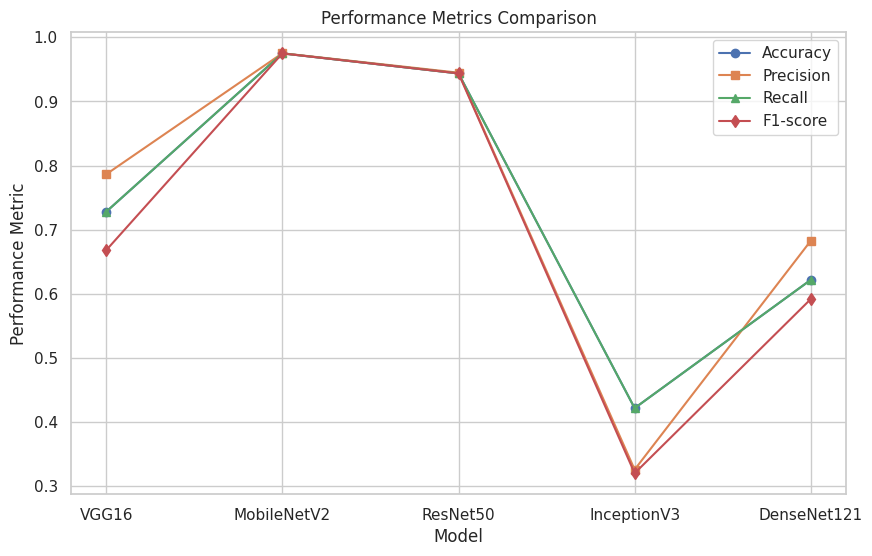

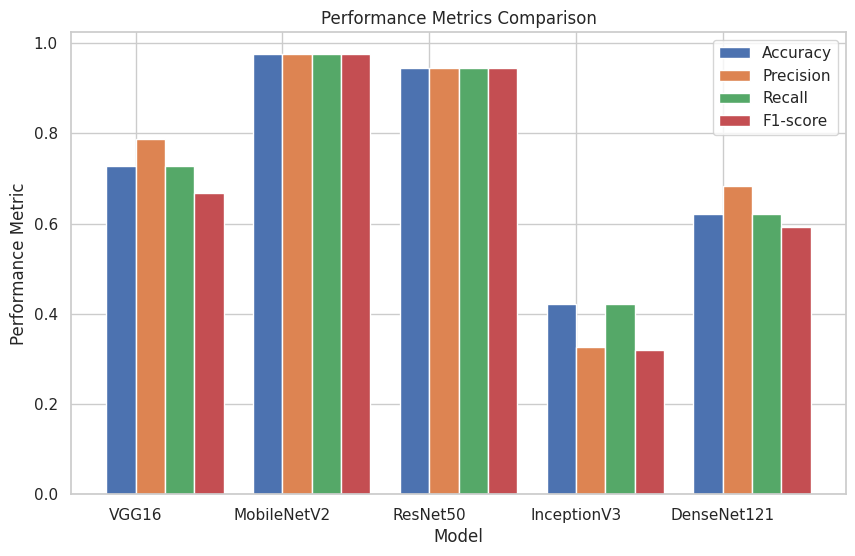

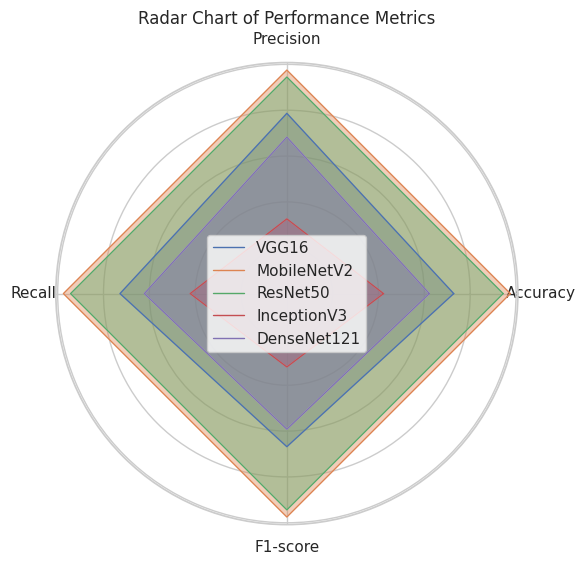

[0.728125, 0.975, 0.94375, 0.421875, 0.621875] [0.7865114602307226, 0.9752124368946087, 0.9448853615520282, 0.32604562737642584, 0.6827933650653764] [0.728125, 0.975, 0.94375, 0.421875, 0.621875] [0.6681265799452287, 0.9749759822373566, 0.9437895084766771, 0.32032177950545293, 0.5918906234854209]


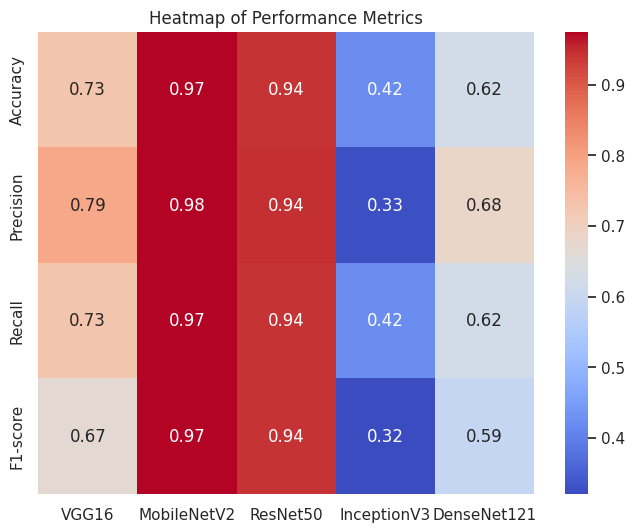

In [151]:
# Assuming you have already trained your models and have them stored in model_1, model_2, model_3, model_4, model_5
# Also assuming you have your test data stored in x_test and y_test

# Define a list of models and their corresponding names
models = [model_1, model_2, model_3, model_4, model_5]
model_names = ['VGG16', 'MobileNetV2', 'ResNet50', 'InceptionV3', 'DenseNet121']

# Lists to store performance metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model
for model in models:
    # Evaluate the model on the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    accuracies.append(accuracy)

    # Calculate classification report (precision, recall, f1-score)
    report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

# Line Chart
plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and F1-score
plt.plot(model_names, accuracies, label='Accuracy', marker='o')
plt.plot(model_names, precisions, label='Precision', marker='s')
plt.plot(model_names, recalls, label='Recall', marker='^')
plt.plot(model_names, f1_scores, label='F1-score', marker='d')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

# Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_data = [accuracies, precisions, recalls, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(model_names))
width = 0.2

for i, metric_data in enumerate(metrics_data):
    ax.bar(x + width * i, metric_data, width, label=metrics[i])

ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)
ax.legend()
plt.show()

# Radar Chart
from math import pi

# Define the metrics and the number of variables
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
num_vars = len(metrics)

# Create the radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model's metrics
for i, model_name in enumerate(model_names):
    values = [accuracies[i], precisions[i], recalls[i], f1_scores[i]]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_name)
    ax.fill(angles, values, alpha=0.4)

# Add labels and legend
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title('Radar Chart of Performance Metrics')
ax.legend()
plt.show()

# Heatmap
# Combine all metrics in a matrix
metrics_matrix = np.array([accuracies, precisions, recalls, f1_scores])

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(metrics_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=model_names, yticklabels=metrics, ax=ax)
ax.set_title('Heatmap of Performance Metrics')
print(accuracies,precisions,recalls,f1_scores)
plt.show()


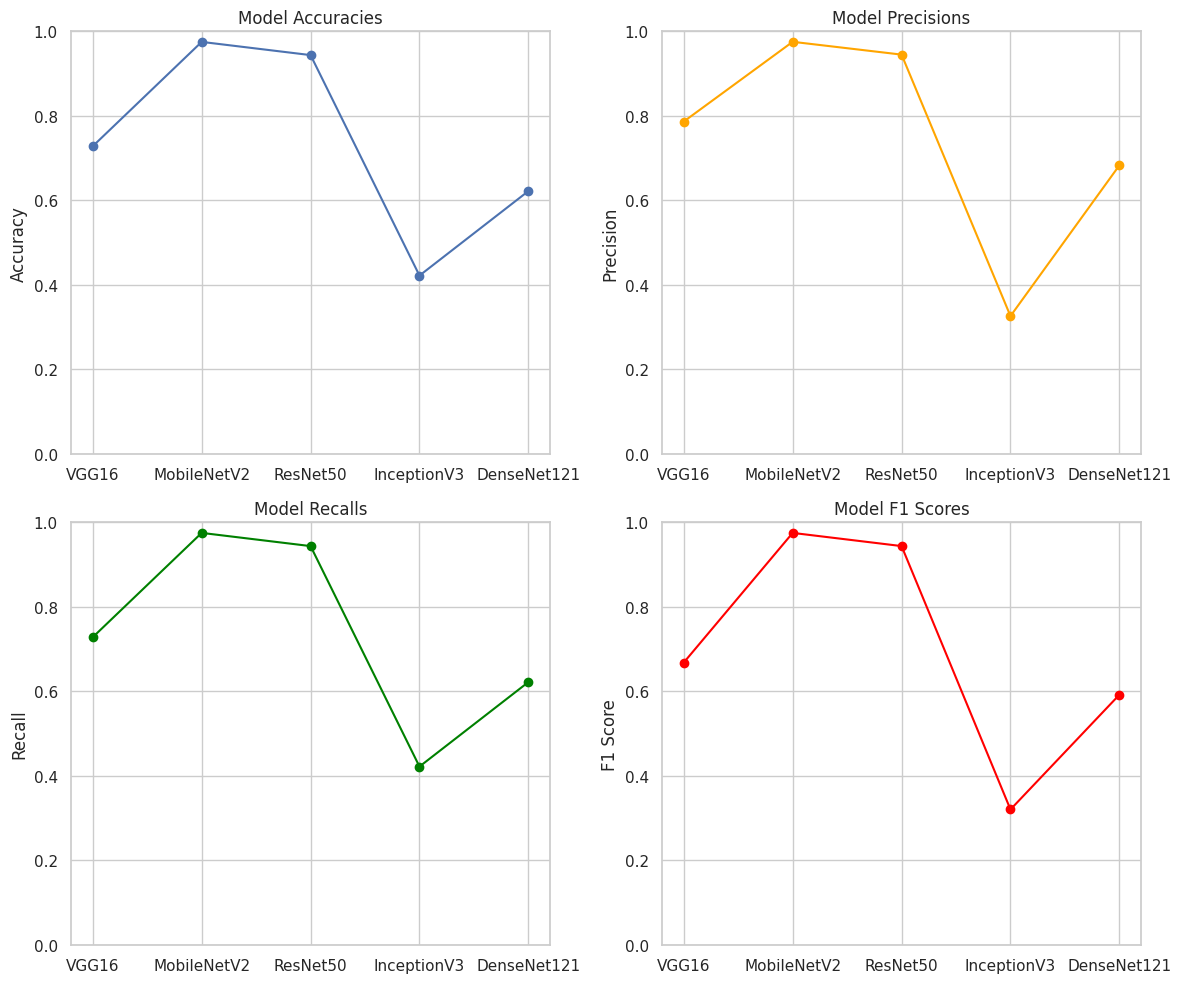

In [153]:
# Plotting the performance metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracies
axs[0, 0].plot(model_names, accuracies, marker='o')
axs[0, 0].set_title('Model Accuracies')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 1)

# Plot precisions
axs[0, 1].plot(model_names, precisions, marker='o', color='orange')
axs[0, 1].set_title('Model Precisions')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim(0, 1)

# Plot recalls
axs[1, 0].plot(model_names, recalls, marker='o', color='green')
axs[1, 0].set_title('Model Recalls')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0, 1)

# Plot F1 scores
axs[1, 1].plot(model_names, f1_scores, marker='o', color='red')
axs[1, 1].set_title('Model F1 Scores')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_ylim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()
